In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [46]:
def gradient_descent(x, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    acc_history = np.zeros(iterations)
    m = x.shape[0]
    x = np.hstack((np.ones((m, 1)), x.reshape(m, n)))
    for i in range(iterations):
        predictions = np.divide(1, 1 + np.exp(-1 * x.dot(theta)))
        theta = theta - (alpha / m) * x.transpose().dot(predictions - y)
        log1 = np.multiply(y, np.log(predictions))
        log2 = np.multiply(1 - y, np.log(1 - predictions))
        cost_history[i] = -1 / m * np.sum(log1 + log2)
        acc_history[i] = (m - np.sum(np.abs(np.round(predictions) - y))) / m
    return theta, cost_history, acc_history


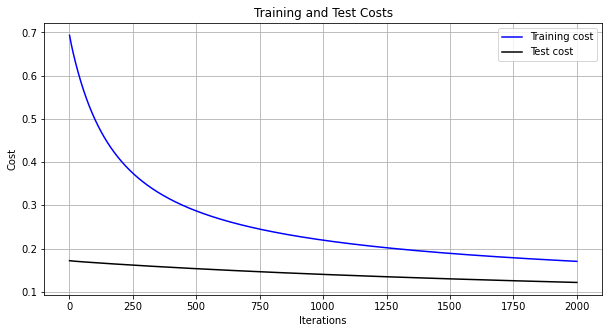

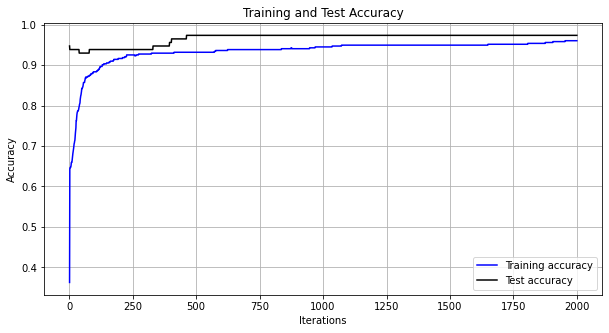

In [47]:
# Problem 1
breast = load_breast_cancer()
breast_data = breast.data
labels = np.reshape(breast.target, (breast_data.shape[0], 1))
df = pd.DataFrame(np.concatenate([breast_data, labels], axis=1))
n = breast_data.shape[1]
x = df.values[:, :n]
y = df.values[:, n]
ss = StandardScaler()
x = ss.fit_transform(x)
mms = MinMaxScaler()
x = mms.fit_transform(x)

# 80% 20% split
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=np.random)
theta = np.zeros(x.shape[1] + 1)
iterations = 2000
alpha = 0.1

# Trains model with variables
theta, train_cost, train_acc = gradient_descent(x_train, y_train, theta, alpha, iterations)
test_cost, test_acc = gradient_descent(x_test, y_test, theta, alpha, iterations)[1:]

# Plots Test cost over iterations
plt.figure(1)
plt.plot(np.linspace(1, iterations, iterations), train_cost, color='blue', label='Training cost')
plt.plot(np.linspace(1, iterations, iterations), test_cost, color='black', label='Test cost')
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Training and Test Costs')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid()

# Plots Test accuracy over iterations
plt.figure(2)
plt.plot(np.linspace(1, iterations, iterations), train_acc, color='blue', label='Training accuracy')
plt.plot(np.linspace(1, iterations, iterations), test_acc, color='black', label='Test accuracy')
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Training and Test Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()


Optimal K Value =  5


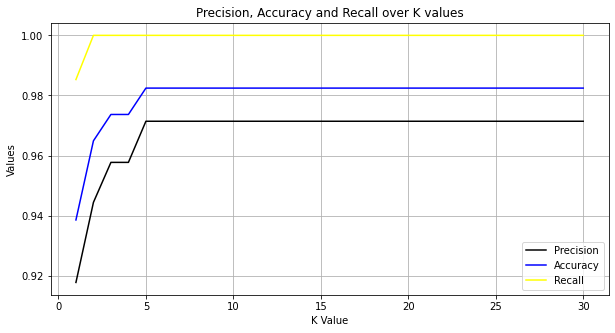

In [48]:
# Problem 2
# PCA on the data
pca = PCA()
pcs = pca.fit_transform(x)

# 80% 20% split 
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(pcs, y, train_size=0.8, test_size=0.2, random_state=np.random)

# PCA Metrics
k = pcs.shape[1]
precision = np.zeros(k)
accuracy = np.zeros(k)
recall = np.zeros(k)
acc_max = 0
k_opt = 0

# Logistic Regression
for i in range(k):
    logreg = LogisticRegression()
    logreg.fit(x_train_p[:, :i + 1], y_train_p)
    y_pred = logreg.predict(x_test_p[:, :i + 1])
    precision[i] = metrics.precision_score(y_test_p, y_pred)
    accuracy[i] = metrics.accuracy_score(y_test_p, y_pred)
    recall[i] = metrics.recall_score(y_test_p, y_pred)

    if accuracy[i] > acc_max:
        acc_max = accuracy[i]
        k_opt = i + 1
# Precision, Accuracy, Recall over K plot
plt.figure(3)
plt.plot(np.linspace(1, k, k), precision, color='black', label='Precision')
plt.plot(np.linspace(1, k, k), accuracy, color='blue', label='Accuracy')
plt.plot(np.linspace(1, k, k), recall, color='yellow', label='Recall')
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Precision, Accuracy and Recall over K values')
plt.ylabel('Values')
plt.xlabel('K Value')
plt.legend()
plt.grid()

print('Optimal K Value = ',k_opt)

In [49]:
# Problem 3
LDA = LinearDiscriminantAnalysis()
LDA.fit(x_train, y_train)
y_pred = LDA.predict(x_test)
print('Precision:', (metrics.precision_score(y_test, y_pred)))
print('Accuracy:', (metrics.accuracy_score(y_test, y_pred)))
print('Recall:', (metrics.recall_score(y_test, y_pred)))

Precision: 0.9436619718309859
Accuracy: 0.9649122807017544
Recall: 1.0
